In [1]:
# XGBOOST features + pair fig
# real data

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt

In [11]:
def label_marker(row):
    if isinstance(row['marker'], str) and 'Natural' in row['marker']:
        return 0
    if isinstance(row['marker'], str) and 'Attack' in row['marker']:
        return 1
    return 

In [12]:
#path = './data/Zero_Day/'
path = '../Autoencoders/new_data/'
#path_normal = path +'VAE_syntheticdata_normal_epoch100_1000000.csv'
path_normal = path +'normal.csv'
path_attack = path + 'attack.csv' # real data

normal_df = pd.read_csv(path_normal)  
attack_df = pd.read_csv(path_attack)  

normal_df['marker'] = normal_df.apply(label_marker, axis=1)
attack_df['marker'] = attack_df.apply(label_marker, axis=1)

normal_label = normal_df['marker'].to_numpy() 
attack_label = attack_df['marker'].to_numpy() 

print(len(normal_label))
print(len(attack_label))

22714
55663


In [13]:
input_df = pd.concat([normal_df, attack_df], ignore_index=True)
input_df = input_df.sample(frac=1) # we suffle the dataframe

input_df = input_df.replace([np.inf, -np.inf], 0)
#scaler = MinMaxScaler()
#input_df = scaler.fit_transform(input_df)


In [14]:
y_col = 'marker'
X_cols = input_df.loc[:, input_df.columns != y_col].columns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_df[X_cols], input_df[y_col],test_size=0.2, 
                                                    random_state=42)

print(' X_train shape',X_train.shape, '\n', 
      'y_train shape', y_train.shape, '\n',
      'X_test shape',X_test.shape, '\n', 
      'y_test shape', y_test.shape)

 X_train shape (62701, 128) 
 y_train shape (62701,) 
 X_test shape (15676, 128) 
 y_test shape (15676,)


In [15]:
from collections import Counter
class_counter = Counter(y_train)
print(' Number of items class 0:', class_counter[0], '\n',
      'Number of items class 1:', class_counter[1])
estimate_imbalancing = class_counter[0]/class_counter[1]
print('Imbalancing Factor: ',estimate_imbalancing)


 Number of items class 0: 18232 
 Number of items class 1: 44469
Imbalancing Factor:  0.4099934786030718


In [19]:
XGB = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.30000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3278456267435863,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [20]:
XGB.fit(X_train, y_train,verbose=1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.30000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3278456267435863,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

Feature: 0, Score: 0.00882
Feature: 1, Score: 0.00858
Feature: 2, Score: 0.00532
Feature: 3, Score: 0.02166
Feature: 4, Score: 0.00762
Feature: 5, Score: 0.00424
Feature: 6, Score: 0.00830
Feature: 7, Score: 0.00662
Feature: 8, Score: 0.00540
Feature: 9, Score: 0.00683
Feature: 10, Score: 0.00411
Feature: 11, Score: 0.00543
Feature: 12, Score: 0.00590
Feature: 13, Score: 0.01112
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.01886
Feature: 18, Score: 0.00573
Feature: 19, Score: 0.00579
Feature: 20, Score: 0.00311
Feature: 21, Score: 0.00972
Feature: 22, Score: 0.00407
Feature: 23, Score: 0.00572
Feature: 24, Score: 0.00849
Feature: 25, Score: 0.00772
Feature: 26, Score: 0.00621
Feature: 27, Score: 0.00835
Feature: 28, Score: 0.00473
Feature: 29, Score: 0.00615
Feature: 30, Score: 0.00832
Feature: 31, Score: 0.00806
Feature: 32, Score: 0.00796
Feature: 33, Score: 0.00634
Feature: 34, Score: 0.00596
Feature: 35, Score: 0.00354
Fe

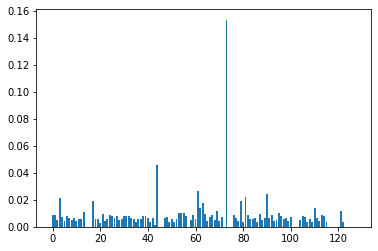

In [24]:
# get importance
importance = XGB.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [45]:
cols = input_df.columns
features = pd.DataFrame({'feature': cols[0:-1], 'contribution': importance})
features = features.sort_values(by=['contribution'],ascending=False)
cols_to_plot = features.feature[:10].tolist() 
cols_to_plot.append('marker')

In [52]:
print (features[:10])

['R3-PM8:V', 'R2-PM8:V', 'R3-PM2:V', 'R4-PM2:V', 'R3-PM12:I', 'R1-PM2:V', 'R1-PM9:V', 'R3-PM11:I', 'R3-PM3:V', 'R4-PM12:I', 'marker']
       feature  contribution
73    R3-PM8:V      0.153655
44    R2-PM8:V      0.045490
61    R3-PM2:V      0.026768
90    R4-PM2:V      0.024046
81   R3-PM12:I      0.022409
3     R1-PM2:V      0.021655
17    R1-PM9:V      0.018858
79   R3-PM11:I      0.018812
63    R3-PM3:V      0.018013
110  R4-PM12:I      0.013878


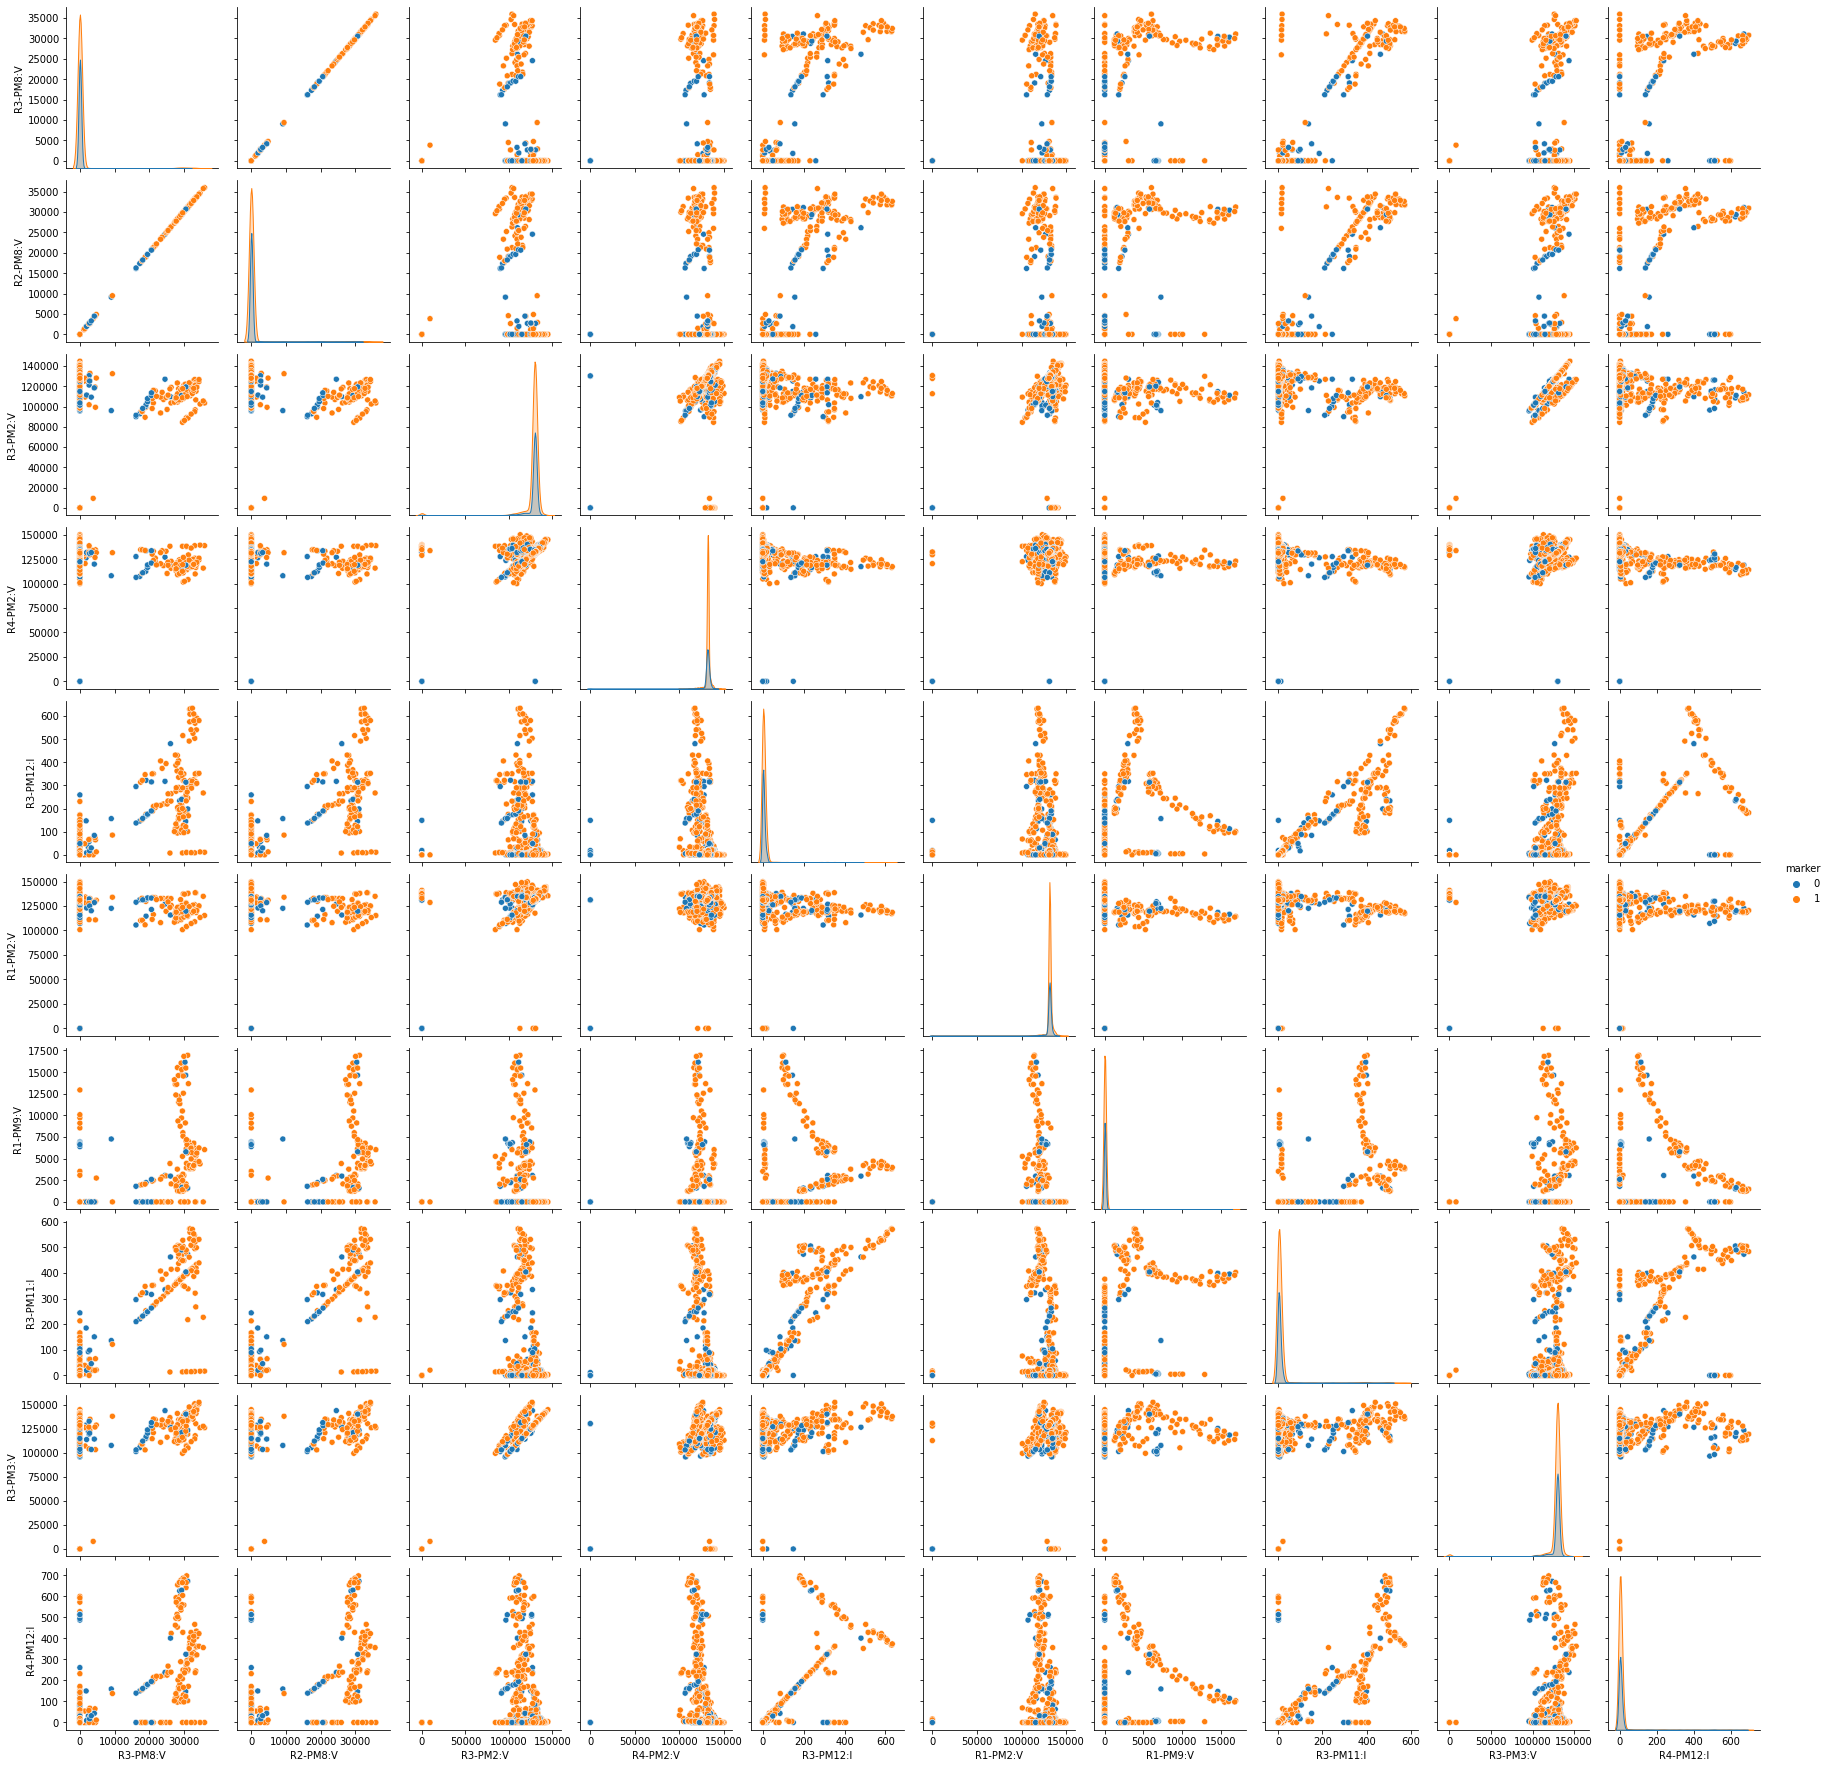

In [49]:
df = input_df.sample(10000)
sns.pairplot(df[cols_to_plot], diag_kind='kde', hue='marker')
#sns.PairGrid(df, vars=cols_to_plot)

In [ ]:
#EOF